In [ ]:
# Final Main Code
# create a webdriver object for chrome-option and configure
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.common.keys import Keys
import time
from pathlib import Path
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException
import pyautogui as pg
global prod_price_dict
prod_price_dict={}
wait_imp = 2
CO = webdriver.ChromeOptions()
CO.add_experimental_option('useAutomationExtension', False)
CO.add_argument('--ignore-certificate-errors')
CO.add_argument('--start-maximized')
wd = webdriver.Chrome(r'D:\Downloads\chromedriver_win32\chromedriver.exe',options=CO)
print ("*************************************************************************** \n")
print("                     Starting Program, Please wait ..... \n")
def flipkart_scrape(item_to_search):
    print ("Connecting to Flipkart")
    #launch URL
    URL = 'https://www.flipkart.com/'
    wd.get(URL)
    #identify search box
    m = wd.find_element(By.NAME,"q")
    #enter search text
    m.send_keys(item_to_search)
    # time.sleep(0.2)
    #perform search with Keys.ENTER
    m.send_keys(Keys.ENTER)
    get_url = wd.current_url
    # Printing the URL
    # print(get_url)
    wd.get(get_url)
    if item_to_search=="skullcandy":
        skullcandy=wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[3]/div/a[2]').get_attribute('href')
        wd.get(skullcandy)
        wd.implicitly_wait(wait_imp)
        f_price = wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[3]/div[1]/div/div[1]')
        pr_name = wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
    elif item_to_search=="fitbit":
        fitbit=wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[3]/div/a[2]').get_attribute('href')
        wd.get(fitbit)
        wd.implicitly_wait(wait_imp)
        f_price = wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[3]/div[1]/div/div')
        pr_name = wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
    elif item_to_search=="iphone14pro":
        fitbit=wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div/div/a').get_attribute('href')
        wd.get(fitbit)
        wd.implicitly_wait(wait_imp)
        f_price = wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[4]/div[1]/div/div[1]')
        pr_name = wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
    elif item_to_search=="samsungs22":
        e=wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div/div/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        f_price = wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[3]/div[1]/div/div')
        pr_name = wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
    elif item_to_search=="acerpredator":
        e=wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[6]/div/div/div/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        f_price = wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[3]/div[1]/div/div[1]')
        pr_name = wd.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
    else:
        print("Please enter the product in the list")
    global product,flipkart_price
    product = pr_name.text
    flipkart_price = f_price.text
    # print (r_price[1:])
    flipkart_price= flipkart_price[1:]
    flipkart_price=int(flipkart_price.replace("₹","").replace(",",""))
    prod_price_dict["Flipkart"] = flipkart_price
    print (" ---> Successfully retrieved the price from Flipkart \n")
    time.sleep(2)
def amazon_scrape(item_to_search):
    print("Connecting to Amazon")
    URL = "https://www.amazon.in/"
    wd.get(URL)
    #identify search box
    m = wd.find_element(By.ID,"twotabsearchtextbox")
    #enter search text
    if item_to_search=="acerpredator":
        m.send_keys(item_to_search[:4]+" "+item_to_search[4:]+" helios")
    # time.sleep(0.2)
    #perform Google search with Keys.ENTER
    m.send_keys(item_to_search)
    m.send_keys(Keys.ENTER)
    get_url = wd.current_url
    # Printing the URL
    # print(get_url)
    wd.get(get_url)
    time.sleep(0.5)
    if item_to_search=="skullcandy":
        skullcandy=wd.find_element(By.XPATH,'//*[@id="search"]/div[1]/div[1]/div/span[1]/div[1]/div[4]/div/div/div/div/div/div[2]/div/div/div[1]/h2/a').get_attribute('href')
        wd.get(skullcandy)
        wd.implicitly_wait(wait_imp)
        a_price = wd.find_element(By.XPATH,'//*[@id="corePriceDisplay_desktop_feature_div"]/div[1]/span[2]/span[2]/span[2]')
    elif item_to_search=="fitbit":
        fitbit=wd.find_element(By.XPATH,'//*[@id="search"]/div[1]/div[1]/div/span[1]/div[1]/div[7]/div/div/div/div/div/div[2]/div/div/div[1]/h2/a').get_attribute('href')
        wd.get(fitbit)
        wd.implicitly_wait(wait_imp)
        a_price = wd.find_element(By.XPATH,'//*[@id="corePriceDisplay_desktop_feature_div"]/div[1]/span[2]/span[2]/span[2]')
    elif item_to_search=="iphone14pro":
        e=wd.find_element(By.XPATH,'//*[@id="search"]/div[1]/div[1]/div/span[1]/div[1]/div[4]/div/div/div/div/div/div/div[3]/div[2]/h2/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        a_price = wd.find_element(By.XPATH,'//*[@id="corePriceDisplay_desktop_feature_div"]/div[1]/span[2]/span[2]/span[2]')
    elif item_to_search=="samsungs22":
        e=wd.find_element(By.XPATH,'//*[@id="search"]/div[1]/div[1]/div/span[1]/div[1]/div[4]/div/div/div/div/div/div/div/div[2]/div/div/div[1]/h2/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        a_price = wd.find_element(By.XPATH,'//*[@id="corePriceDisplay_desktop_feature_div"]/div[1]/span[2]/span[2]/span[2]')
    elif item_to_search=="acerpredator":
        e=wd.find_element(By.XPATH,'//*[@id="search"]/div[1]/div[1]/div/span[1]/div[1]/div[5]/div/div/div/div/div/div[2]/div/div/div[1]/h2/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        a_price = wd.find_element(By.XPATH,'//*[@id="corePriceDisplay_desktop_feature_div"]/div[1]/span[2]/span[2]/span[2]')
    else:
        print("Please enter the product in the list")
    global amazon_price
    amazon_price = a_price.text
    amazon_price=int(amazon_price.replace("₹","").replace(",",""))
    prod_price_dict["Amazon"]=amazon_price
    # print (raw_p[2:8])
    print (" ---> Successfully retrieved the price from Amazon \n")
    time.sleep(2)
def croma_scrape(item_to_search):
    print ("Connecting to Croma")
    URL = "https://www.croma.com/"
    wd.get(URL)
    #identify search box
    wd.refresh()
    time.sleep(0.5)
    m = wd.find_element(By.ID,'search')
    #enter search text
    m.send_keys(item_to_search)
    m.send_keys(Keys.ENTER)
    get_url = wd.current_url
    wd.get(get_url)
    time.sleep(0.5)
    try:
        if item_to_search=="skullcandy":
            e=wd.find_element(By.XPATH,'//*[@id="finderResults"]/ul/div[3]/div[1]/div[2]/div[1]/div/span/li/a').get_attribute('href')
            wd.get(e)
            wd.implicitly_wait(wait_imp)
            c_price = wd.find_element(By.XPATH,'//*[@id="overview"]/div[1]/div[2]/div[1]/div[1]/span[2]')
        elif item_to_search=="fitbit":
            e=wd.find_element(By.XPATH,'//*[@id="231609"]/div[2]/div[1]/h3/a').get_attribute('href')
            wd.get(e)
            wd.implicitly_wait(wait_imp)
            c_price = wd.find_element(By.XPATH,'//*[@id="pdp-product-price"]')
        elif item_to_search=="iphone14pro":
            e=wd.find_element(By.XPATH,'//*[@id="261977"]/div[2]/div[1]/h3/a').get_attribute('href')
            wd.get(e)
            wd.implicitly_wait(wait_imp)
            c_price = wd.find_element(By.XPATH,'//*[@id="pdp-product-price"]')
        elif item_to_search=="samsungs22":
            e=wd.find_element(By.XPATH,'//*[@id="248898"]/div[2]/div[1]/h3/a').get_attribute('href')
            wd.get(e)
            wd.implicitly_wait(wait_imp)
            c_price = wd.find_element(By.XPATH,'//*[@id="pdp-product-price"]')
        elif item_to_search=="acerpredator":
            e=wd.find_element(By.XPATH,'//*[@id="245700"]/div[2]/div[1]/h3/a').get_attribute('href')
            wd.get(e)
            wd.implicitly_wait(wait_imp)
            c_price = wd.find_element(By.XPATH,'//*[@id="pdp-product-price"]')
        else:
            print("Please enter the product in the list")
        global croma_price
        croma_price = c_price.text
        croma_price=int(float(croma_price.replace("₹","").replace(",","")))
        prod_price_dict["Croma"]=croma_price
        # print (raw_p[2:8])
        print (" ---> Successfully retrieved the price from Croma \n")
        time.sleep(2)
    except NoSuchElementException:
        print("Product not available")
        croma_price=0
        prod_price_dict["Croma"]=croma_price
def gadget_scrape(item_to_search):
    print ("Connecting to Gadgetsnow")
    URL = "https://shop.gadgetsnow.com/"
    wd.get(URL)
    #identify search box
    m = wd.find_element(By.XPATH,'//*[@id="globalSearch"]')
    #enter search text
    if item_to_search=="samsungs22":
        m.send_keys(item_to_search[:7]+" galaxy "+item_to_search[7:])
    elif item_to_search=="acerpredator":
        m.send_keys(item_to_search[:4]+" "+item_to_search[4:])
    else:
        m.send_keys(item_to_search)
    # time.sleep(0.2)
    #perform search with Keys.ENTER
    m.send_keys(Keys.ENTER)
    get_url = wd.current_url
    # Printing the URL
    # print(get_url)
    wd.get(get_url)
    time.sleep(1.5)
    if item_to_search=="skullcandy":
        e=wd.find_element(By.XPATH,'//*[@id="contentbody"]/div[6]/div[4]/div[15]/div[2]/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        g_price = wd.find_element(By.XPATH,'//*[@id="contentbody"]/div[5]/div[1]/div/div[1]/div[2]/div/span[1]/meta[1]').get_attribute('content')
    elif item_to_search=="fitbit":
        e=wd.find_element(By.XPATH,'//*[@id="contentbody"]/div[6]/div[4]/div[1]/div[2]/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        g_price = wd.find_element(By.XPATH,'//*[@id="contentbody"]/div[5]/div[1]/div/div[1]/div[2]/div[1]/span[1]/meta[1]').get_attribute('content')
    elif item_to_search=="iphone14pro":
        e=wd.find_element(By.XPATH,'//*[@id="contentbody"]/div[6]/div[4]/div[2]/div[2]/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        g_price = wd.find_element(By.XPATH,'//*[@id="contentbody"]/div[5]/div[1]/div/div[1]/div[2]/div[1]/span[1]/meta[1]').get_attribute('content')
    elif item_to_search=="samsungs22":
        e=wd.find_element(By.XPATH,'//*[@id="contentbody"]/div[6]/div[4]/div[4]/div[2]/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        g_price = wd.find_element(By.XPATH,'//*[@id="contentbody"]/div[5]/div[1]/div/div[1]/div[2]/div/span[1]/meta[1]').get_attribute('content')
    elif item_to_search=="acerpredator":
        e=wd.find_element(By.XPATH,'//*[@id="contentbody"]/div[6]/div[4]/div[6]/div[2]/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        global raw_cr,m_price
        g_price = wd.find_element(By.XPATH,'//*[@id="contentbody"]/div[5]/div[1]/div/div[1]/div[2]/div[1]/span[1]/meta[1]').get_attribute('content')
    else:
        print("Please enter the product in the list")
    global gadget_price
    gadget_price = g_price
    gadget_price=int(gadget_price)
    prod_price_dict["Gadgetsnow"]=gadget_price
    # print (raw_p[2:8])
    print (" ---> Successfully retrieved the price from Gadgetsnow site \n")
    time.sleep(2)
def smartprix_scrape(item_to_search):
    print ("Connecting to Smartprix")
    URL = "https://www.smartprix.com/"
    wd.get(URL)
    m = wd.find_element(By.NAME,"q")
    #enter search text
    if item_to_search=="skullcandy":
        m.send_keys(item_to_search+"dime earbuds")
    else:
        m.send_keys(item_to_search)  
    m.send_keys(Keys.ENTER)
    get_url = wd.current_url
    # Printing the URL
    # print(get_url)
    wd.get(get_url)
    time.sleep(1.5)
    if item_to_search=="skullcandy":
        e=wd.find_element(By.XPATH,'//*[@id="app"]/main/div[1]/div[2]/div[2]/div[1]/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        s_price = wd.find_element(By.XPATH,'//*[@id="app"]/main/div[1]/div[2]/div[3]/div[1]/div[1]')
    elif item_to_search=="fitbit":
        e=wd.find_element(By.XPATH,'//*[@id="app"]/main/div[1]/div[2]/div[2]/div[6]/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        s_price = wd.find_element(By.XPATH,'//*[@id="app"]/main/div[1]/div[2]/div[1]/div[1]/div/div[2]/strong')
    elif item_to_search=="iphone14pro":
        e=wd.find_element(By.XPATH,'//*[@id="app"]/main/div[1]/div[2]/div[2]/div[2]/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        s_price = wd.find_element(By.XPATH,'//*[@id="app"]/main/div[1]/div[2]/div[1]/div[1]/div/div[2]/strong')
    elif item_to_search=="samsungs22":
        e=wd.find_element(By.XPATH,'//*[@id="app"]/main/div[1]/div[2]/div[2]/div[2]/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        s_price = wd.find_element(By.XPATH,'//*[@id="app"]/main/div[1]/div[2]/div[1]/div[1]/div/div[2]/strong')
    elif item_to_search=="acerpredator":
        e=wd.find_element(By.XPATH,'//*[@id="app"]/main/div[1]/div[2]/div[2]/div[1]/a').get_attribute('href')
        wd.get(e)
        wd.implicitly_wait(wait_imp)
        s_price = wd.find_element(By.XPATH,'//*[@id="app"]/main/div[1]/div[2]/div[1]/div[1]/div/div[2]/strong')
    else:
        print("Please enter the product in the list")
    global smartprix_price
    smartprix_price = s_price.text
    smartprix_price = smartprix_price[1:]
    smartprix_price=int(float(smartprix_price.replace("₹","").replace(",","")))
    prod_price_dict["Smartprix"]=smartprix_price
    print (" ---> Successfully retrieved the price from Smartprix \n")
    time.sleep(2)
def display():
    print ("#------------------------------------------------------------------------#")
    print ("Price for [{}] on all websites, Prices are in INR \n".format(product))
    print("  Price available at Flipkart is: ",flipkart_price)
    print("  Price available at Amazon is: ",amazon_price)
    print("  Price available at 91mobiles is: ",croma_price)
    print("  Price available at Gadgetsnow is: ",gadget_price)
    print("  Price available at Smartprix is: ",smartprix_price,"\n Dict :",prod_price_dict)
items=print("Products available for scrapping : ","\n 1. Skullcandy","\n 2. Fitbit","\n 3. Iphone 14 Pro","\n 4. Samsung S22","\n 5. Acer Predator")
item_to_search = input("Enter the name of the Product: ").lower().replace(" ","")
try:
    flipkart_scrape(item_to_search)
except Exception as e:
    print(e)
    pass
try:
    amazon_scrape(item_to_search)
except Exception as e:
    print(e)
    pass
try:
    croma_scrape(item_to_search)
except Exception as e:
    print(e)
    pass
try:
    gadget_scrape(item_to_search)
except Exception as e:
    print(e)
    pass
try:
    smartprix_scrape(item_to_search)
except Exception as e:
    print(e)
    pass
display()


C:\Users\Aswin Raj\AppData\Local\Temp\ipykernel_26660\1611118534.py:20: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(r'D:\Downloads\chromedriver_win32\chromedriver.exe',options=CO)


*************************************************************************** 

                     Starting Program, Please wait ..... 

Products available for scrapping :  
 1. Skullcandy 
 2. Fitbit 
 3. Iphone 14 Pro 
 4. Samsung S22 
 5. Acer Predator
Enter the name of the Product: Fitbit
Connecting to Flipkart
 ---> Successfully retrieved the price from Flipkart 

Connecting to Amazon
 ---> Successfully retrieved the price from Amazon 

Connecting to Croma
 ---> Successfully retrieved the price from Croma 

Connecting to Gadgetsnow
 ---> Successfully retrieved the price from Gadgetsnow site 

Connecting to Smartprix


In [4]:
Price=list(prod_price_dict.values())
Price

[14999, 11900, 6994, 14900, 8999]

In [5]:
Web_Name =list(prod_price_dict.keys())
Web_Name

['Flipkart', 'Amazon', 'Croma', 'Gadgetsnow', 'Smartprix']

In [6]:
import pandas as pd
data1 = {'Website':Web_Name,'Price':Price}
df1 = pd.DataFrame(data1, columns= ['Website','Price'])
print (df1)

      Website  Price
0    Flipkart  14999
1      Amazon  11900
2       Croma   6994
3  Gadgetsnow  14900
4   Smartprix   8999


In [9]:
df1.dropna(how='all')

,Website,Price
0,Flipkart,14999
1,Amazon,11900
2,Croma,6994
3,Gadgetsnow,14900
4,Smartprix,8999


In [10]:
import sqlite3
conn = sqlite3.connect('Ecommerce')
c = conn.cursor()

In [13]:
c.execute('CREATE TABLE IF NOT EXISTS Product (Website text, Price number)')
conn.commit()

In [14]:
df1.to_sql('Product', conn, if_exists='replace', index = False)

5

In [15]:
c.execute(''' SELECT * FROM Product''')
for row in c.fetchall():
    print (row)

('Flipkart', 14999)
('Amazon', 11900)
('Croma', 6994)
('Gadgetsnow', 14900)
('Smartprix', 8999)


<AxesSubplot:xlabel='Website', ylabel='Price'>

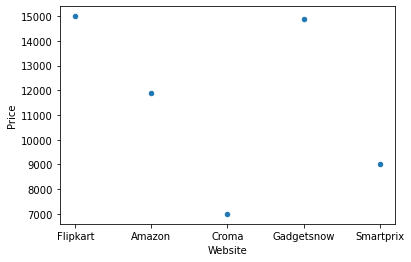

In [16]:
df1.plot(x='Website', y='Price', kind='scatter')

<AxesSubplot:xlabel='Website'>

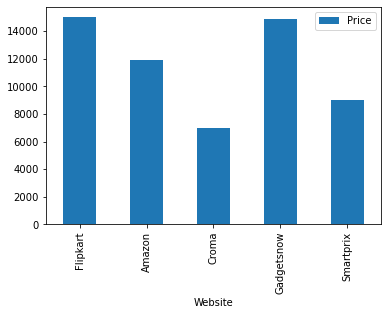

In [17]:
df1.plot(x='Website', y='Price', kind='bar')

In [18]:
#mysql> select *from MinValueDemo where ProductPrice=(select min(ProductPrice) from MinValueDemo);

c.execute(''' SELECT * FROM Product WHERE Price=(SELECT MIN(Price) FROM Product)''')
website=[]
for row in c.fetchall():
    minimum=list(row)
    website.append(minimum[0])
    print(minimum)

['Croma', 6994]


In [20]:
website=" , ".join(website)

In [21]:
print("After comparing through the the websites,",website,"offers the cheapest price for ",item_to_search,"at: Rs.",minimum[1] )

After comparing through the the websites, Croma offers the cheapest price for  fitbit at: Rs. 6994
